# Primer proyecto de ML

Lo primero que tengo que hacer es extraer todos los datos y ordenarlos. El Programa se basara en predecir los precios de venta de las casas (El precio está en la ultima columna)

Cargamos las librerias que usaremos

In [1]:
import pandas as pd #importaremos panda para leer los arvhivos csv
import matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

Datos de entrenamiento

El archivo csv está dividido por comas y son 79 clasificaciones (columnas) en donde la última columna indica el precio.

In [2]:
train = pd.read_csv("train.csv",sep=',',header='infer') #pandas.read_csv lee el archivo csv para manipularlo, en este caso
# sep indica que se separa por una coma y header dice que el programa lea solo el nombre de la primer fila
#luego, estos los toma como el nombre de los datos que apareceran en las columnas. Dado una base de datos, como hacer un csv?
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train.shape #tamaño de la matriz (filas,columnas)

(1460, 81)

El parámetro que vamos a querer predecir es 

In [4]:
precio_train = train['SalePrice']
precio_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Datos de prueba

In [5]:
test = pd.read_csv("test.csv",sep=',',header='infer')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018012801850>]],
      dtype=object)

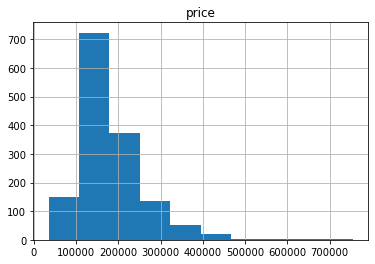

In [6]:
prices = pd.DataFrame({"price":train["SalePrice"]})
prices.hist()

Y definimos los conjuntos a los que les haremos la regresión, esto es 

In [7]:
caract_train = train.drop('SalePrice',axis=1) 
caract_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [8]:
type(caract_train)

pandas.core.frame.DataFrame

y tambien

In [9]:
precio_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [10]:
type(precio_train)

pandas.core.series.Series

## Objetivo:
-En cada fila aparececen caracteristicas de las casas.

-Queremos predecir el precio de las casas con esas caracteristicas.

Para esto, usatemos los métodos de Lasso y Ridge. Necesitamos nuevas librerias esto es:

In [11]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

Y con resto procederemos a hacer nuestros modelos

# Preparación de los datos

Para hacer sin errores las regresiones tenemos que quitar las variables categoricas (ya que no sabe como leerlas la regresión) y las hacemos variables Dummies.

In [31]:
caract_trainbueno.dtypes

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 289, dtype: object

In [12]:
caract_trainbueno = pd.get_dummies(caract_train)
caract_trainbueno.shape

(1460, 289)

además quitamos todos los valores NAN, esto se hace como

In [21]:
caract_trainbueno1 = caract_trainbueno.fillna(0)
caract_trainbueno1.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0


lo mismo hacemos con el archivo test

In [29]:
testbueno = pd.get_dummies(test,dtype=float)
testbueno.shape

(1459, 271)

In [27]:
testbueno1 = testbueno.fillna(0)
type(testbueno1)

pandas.core.frame.DataFrame

# Modelos de Regression

## Modelo de regresión lineal

Dadas las variables caract y precio podemos hacer

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(caract_trainbueno1, precio_train)

LinearRegression()

In [20]:
plt.plot(testbueno1, lr.predict(testbueno1),'b',alpha=0.6, label='Prediction')
plt.plot(testbueno1, precio_train ,'r--', label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 289 is different from 271)